# Image processing for timelapse blob images
-> convert to grayscale, homogeneize light, maybe crop

## Read image
will have to be adapted for batch processing

In [10]:
%cd images-originals/
%ls

[WinError 2] The system cannot find the file specified: 'images-originals/'
C:\Users\pauli\OneDrive - Hogeschool der Kunsten Den Haag\Documents\KABK BA3\Block 3 Internship\Image Processing\images-originals
 Volume in drive C is OS
 Volume Serial Number is BCE0-6C2D

 Directory of C:\Users\pauli\OneDrive - Hogeschool der Kunsten Den Haag\Documents\KABK BA3\Block 3 Internship\Image Processing\images-originals

21/02/2022  14:09    <DIR>          .
21/02/2022  14:09    <DIR>          ..
28/02/2022  13:13         1.565.611 grayscale.jpg
21/02/2022  14:14         5.188.724 sharpen.jpg
21/02/2022  14:06            29.748 sharpenplt.jpg
19/01/2022  21:58         4.445.272 tl10-001.jpg
19/01/2022  21:58         4.430.547 tl10-002.jpg
19/01/2022  21:58         4.419.941 tl10-003.jpg
19/01/2022  21:58         4.414.016 tl10-004.jpg
19/01/2022  21:58         4.420.549 tl10-005.jpg
19/01/2022  21:58         4.416.406 tl10-006.jpg
19/01/2022  21:58         4.410.025 tl10-007.jpg
19/01/2022  21:58  

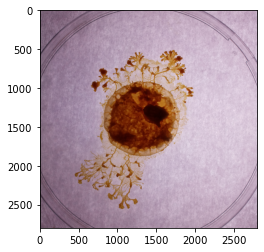

In [11]:
import matplotlib.image as mpimg
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_path = 'tl10-168.jpg'

BGR_img = cv2.imread(img_path)
orig_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB)
#img = mpimg.imread('tl10-168.jpg')
plt.imshow(orig_img)
#plt.imshow(img_b)

In [4]:
#sharpen
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img_sh = cv2.filter2D(orig_img, -1, kernel)
#show and save
plt.imshow(img)
img_save = cv2.cvtColor(img_sh, cv2.COLOR_RGB2BGR)
cv2.imwrite("sharpen.jpg", img_save)

NameError: name 'img' is not defined

# Global adjustment of brightness and contrast

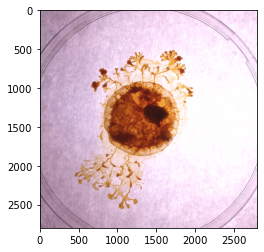

In [12]:
#global adjustment of brightness and contrast
#    alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
#    beta = int(input('* Enter the beta value [0-100]: '))
alpha = 1.2   #contrast
beta = 20   #brightness
adj_img = cv2.convertScaleAbs(orig_img, alpha=alpha, beta=beta)
plt.imshow(adj_img)

## Conversion to grayscale
parameters to adjust to darken yellow tones

True

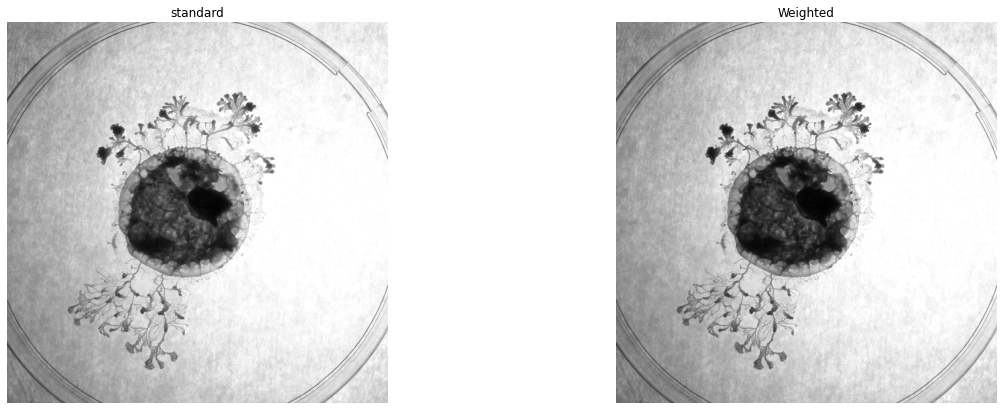

In [14]:
# conversion to grayscale
#https://amiradata.com/convert-an-image-to-grayscale-using-python/
from matplotlib import pyplot as plt

img = adj_img

# create figure
fig = plt.figure(figsize=(20, 7))
# setting values to rows and column variables
rows = 1
columns = 2
 
R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]

# standard values for grayscale conversion
gray_img_st = 0.2989 * R + 0.587 * G + 0.114 * B
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(gray_img_st, cmap='gray')
plt.axis('off')
plt.title("standard")

# weighted to darken yellow tones
gr_img = 0.0989 * R + 0.487 * G + 0.114 * B
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.title("Weighted")
#plt.imshow(gray_img, cmap='gray')
#plt.show()
#save
cv2.imwrite("grayscale.jpg", gr_img)

## Global brightness and contrast adjustment
https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html

In [ ]:
from __future__ import print_function
from builtins import input
import cv2 as cv
import numpy as np
import argparse

image = gray_img
new_image = np.zeros(image.shape, image.dtype)
alpha = 1.0 # Simple contrast control
beta = 0    # Simple brightness control

new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)

In [ ]:
# create figure to display the resulting image
fig = plt.figure(figsize=(20, 7))
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.title("original")
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 2)
plt.imshow(new_image, cmap='gray')
plt.axis('off')
plt.title("adjusted")

 Basic Linear Transforms 
-------------------------


Text(0.5, 1.0, 'adjusted')

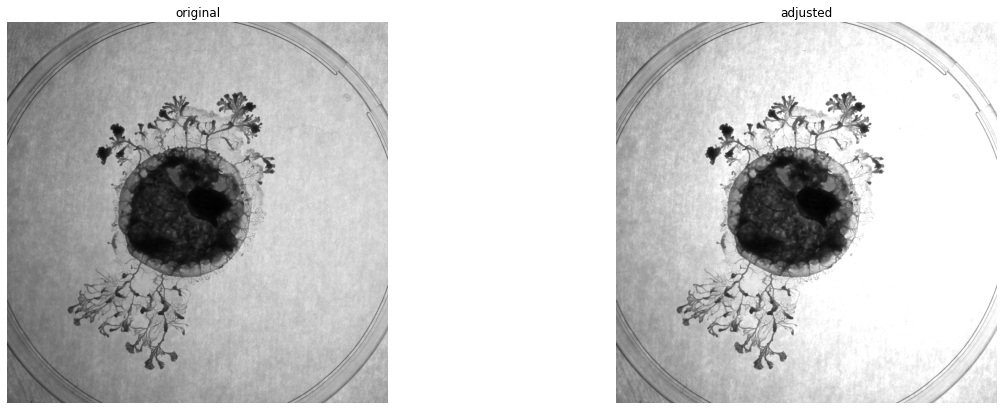

In [41]:
from __future__ import print_function
from builtins import input
import cv2 as cv
import numpy as np
import argparse

# Read image given by user
#parser = argparse.ArgumentParser(description='Code for Changing the contrast and brightness of an image! tutorial.')
#parser.add_argument('--input', help='Path to input image.', default='lena.jpg')
#args = parser.parse_args()
#image = cv.imread(cv.samples.findFile(args.input))
image = gray_img
if image is None:
    print('Could not open or find the image: ', args.input)
    exit(0)
new_image = np.zeros(image.shape, image.dtype)
alpha = 1.0 # Simple contrast control
beta = 0    # Simple brightness control
# Initialize values
print(' Basic Linear Transforms ')
print('-------------------------')

# to ask input
#try:
#    alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
#    beta = int(input('* Enter the beta value [0-100]: '))
#except ValueError:
#    print('Error, not a number')
#OR just define alpha and beta
alpha = 1.1   #contrast
beta = 6   #brightness

# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but we wanted to show you how to access the pixels :)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255)
#cv.imshow('Original Image', image)
#cv.imshow('New Image', new_image)

# create figure
fig = plt.figure(figsize=(20, 7))
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.title("original")
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 2)
plt.imshow(new_image, cmap='gray')
plt.axis('off')
plt.title("adjusted")

# Wait until user press some key
#cv.waitKey()

In [36]:
# not functioning, seems to be made for merging images
contrast = 1
brightness = 1
out = cv2.addWeighted(gray_img, contrast, img, 0, brightness)
output = cv2.addWeighted

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


# Linear gradient to balance brightness

Depending on the light field, might be useful to have a linear gradient instead/on top of the radial one.

## Radial gradient to balance brightness

Adjusting brightness radially (due to led ring):
https://www.geeksforgeeks.org/changing-the-contrast-and-brightness-of-an-image-using-python-opencv/
https://happycoding.io/examples/processing/for-loops/radial-gradient (to draw gradients but same for exploring pixels)
http://opensask.ca/Python/MoreAboutIteration/ImageProcessingWithSelection.html (process pix by pix in diff areas)
https://www.geeksforgeeks.org/create-a-vignette-filter-using-python-opencv/ (for vignette -> to reverse)

In [ ]:
# Radial gradient to adjust brightness 


In [ ]:
# seems to work but very slow, is there a way to optimize it ?

import numpy as np
import cv2
   
     
#reading the image
input_image = cv2.imread('food.jpeg')
   
#resizing the image according to our need
# resize() function takes 2 parameters, 
# the image and the dimensions
input_image = cv2.resize(input_image, (480, 480))
   
# Extracting the height and width of an image
rows, cols = input_image.shape[:2]
   
# generating vignette mask using Gaussian
# resultant_kernels
X_resultant_kernel = cv2.getGaussianKernel(cols,200)
Y_resultant_kernel = cv2.getGaussianKernel(rows,200)
   
#generating resultant_kernel matrix
resultant_kernel = Y_resultant_kernel * X_resultant_kernel.T
   
#creating mask and normalising by using np.linalg
# function
mask = 255 * resultant_kernel / np.linalg.norm(resultant_kernel)
output = np.copy(input_image)
   
# applying the mask to each channel in the input image
for i in range(3):
    output[:,:,i] = output[:,:,i] * mask
       
#displaying the original image  
cv2.imshow('Original', input_image)
   
#displaying the vignette filter image
cv2.imshow('VIGNETTE', output)
   
# Maintain output window utill
# user presses a key
cv2.waitKey(0)
   
# Destroying present windows on screen
cv2.destroyAllWindows()


# Contour - edge filters
https://github.com/trucabrac/python_for_microscopists/blob/master/103_edge_filters.py

In [15]:
"""
Canny:
The Process of Canny edge detection algorithm can be broken down to 5 different steps:
1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Find the intensity gradients of the image
3. Apply non-maximum suppression to get rid of spurious response to edge detection
4. Apply double threshold to determine potential edges (supplied by the user)
5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that
are weak and not connected to strong edges.
"""
#Autocanny
sigma = 0.3
median = np.median(gr_img)

# apply automatic Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma) * median))
upper = int(min(255, (1.0 + sigma) * median))
auto_canny = cv2.Canny(img, lower, upper)

#cv2.imshow("Auto Canny", auto_canny) #indeed much better than Canny directly applied
cv2.waitKey(0)
cv2.destroyAllWindows()


In [16]:
#other methods for edge detection

from skimage.filters import roberts, sobel, scharr, prewitt, farid
roberts_img = roberts(gr_img)
sobel_img = sobel(gr_img)
scharr_img = scharr(gr_img)
prewitt_img = prewitt(gr_img)
farid_img = farid(gr_img)
cv2.imshow("Roberts", roberts_img)
cv2.imshow("Sobel", sobel_img)
cv2.imshow("Scharr", scharr_img)
cv2.imshow("Prewitt", prewitt_img)
cv2.imshow("Farid", farid_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Draw contour and bounding box